# A Data Model

We now have all the cord building blocks for working with data in python. You could probably do most of what you needed to do just with what we have covered so far.
* loading gridded and tabular data
* performing operation on each items of data or a collection of data]
* calculate statistics on the data
* visualise the data or derived statistics

There are some disadvatages to this:
* you will have to implement many common operations yourself
* there will be a lot of repetition in your code
* keeping track of what the values represent will be difficult, leading to errors

When working on a data science project (as in any project) we don't want to be thinking all the time about the low level details of data loading, manipulation visualisation. In the same way we don't care about what the actual machine instructions being executed by the hardware are or the eact memory address of our data, we don't want to think about low-level loops and conditionals. We want to think at higher a level about the operations on our data as they relate to the problem we are trying to solve. To achieve this, instead of working with the low-level operations as we have seen so far, we will start using a **data model**.

In [1]:
import pathlib
import csv

In [2]:
import pandas

## What are data models and why are they useful?

So far we have been creating, viewing and manipulating raw data. It is not **self-describing**. To make our data processing easier we create a **data model**.

*A data model is an abstract model that organizes elements of data and standardizes how they relate to one another and to the properties of real-world entities.* - Wikipedia

Basically, a data model holds data in an object that is easier and more convenient to use than raw 1s and 0s. This can include a way to store metadata with the the data, displaying the data through interfaces that make it easier to understand and automatically perfoming functions for us that would otherwise require a lot of engineering.

## Tabular data
Tabular data is data that is arranged in a table, where each row is a data point and each column represents a different feature or measurement. For example each row could be a data for an employee and the columns could include features such as name, address, phone numer, salary, employee ID etc.

lets start looking at our raw data. How do we turn this into a data model? We might start by adding some metadata

In [3]:
with open('weather.csv') as td_file1:
    td_list = [tdr1 for tdr1 in csv.reader(td_file1)]
td_list      

[['time', 'temperature', 'wind', 'rain'],
 ['1400', '21', '2', '0'],
 ['1500', '24', '5', '0'],
 ['1600', '20', '15', '1'],
 ['1700', '22', '5', '15'],
 ['1800', '21', '1', '0']]

In [4]:
td_list[1]

['1400', '21', '2', '0']

In [5]:
with open('weather.csv') as td_file1:
    td_reader1 = csv.DictReader(td_file1)
    td_rows = {tdr1['time']: tdr1 for tdr1 in td_reader1}
td_rows        

{'1400': {'time': '1400', 'temperature': '21', 'wind': '2', 'rain': '0'},
 '1500': {'time': '1500', 'temperature': '24', 'wind': '5', 'rain': '0'},
 '1600': {'time': '1600', 'temperature': '20', 'wind': '15', 'rain': '1'},
 '1700': {'time': '1700', 'temperature': '22', 'wind': '5', 'rain': '15'},
 '1800': {'time': '1800', 'temperature': '21', 'wind': '1', 'rain': '0'}}

In [6]:
td_rows['1600']['temperature']

'20'

We might define some operations to be performed on the data.

In [7]:
print(f'total rain between {list(td_rows.keys())[0]} and {list(td_rows.keys())[-1]} is {sum([float(obs1["rain"]) for time1, obs1 in td_rows.items()])}mm.')

total rain between 1400 and 1800 is 16.0mm.


## Third party libraries - pandas

To enable us to work with Data Models easily, we can use a higher-level libary where the data model is an integral part of the code, rather than something we awkwardly implement ourselves. The standard library for working with tabular data in python is **Pandas**

https://pandas.pydata.org/docs/


### Data model in pandas
The standard object for working with tabular data in python is the DataFrame.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

This is provides an intuitive way to access and manipulate data based on a data model.

In [8]:
weather_df = pandas.read_csv('weather.csv')

In [9]:
weather_df

,time,temperature,wind,rain
0,1400,21,2,0
1,1500,24,5,0
2,1600,20,15,1
3,1700,22,5,15
4,1800,21,1,0


In [10]:
weather_df['temperature']

0    21
1    24
2    20
3    22
4    21
Name: temperature, dtype: int64

In [11]:
#row and column metadata

In [12]:
weather_df[weather_df['time'] >= 1600]

,time,temperature,wind,rain
2,1600,20,15,1
3,1700,22,5,15
4,1800,21,1,0


In [13]:
weather_other_df = pandas.read_csv('weather2.csv')


You can combine datasets based on a common variable (this is a bit like a *JOIN* operation in a SQL database)

In [14]:
weather_merged = pandas.merge(weather_df, weather_other_df, on='time')
weather_merged

,time,temperature,wind,rain,dewpoint,pressure
0,1400,21,2,0,17,1007
1,1500,24,5,0,19,1005
2,1600,20,15,1,20,1003
3,1700,22,5,15,18,1006
4,1800,21,1,0,17,1008


### Real-world data - XBT project

The XBT project is a Climate Science project to use machine learning to fill in missing metadata. More info on the project:

* Description: https://medium.com/informatics-lab/xbt-project-summary-using-machine-learning-to-infer-missing-metadata-in-climate-science-datasets-3ae55fba320a
* Code: https://github.com/MetOffice/XBTs_classification

The data is freely avaiable from the WOD database. We are using some preprocessed data as an example of tabular data handling by Pandas.

In [15]:
xbt_dir = pathlib.Path('/data/xbt-data/csv_with_imeta')

In [16]:
xbt_paths = list(xbt_dir.iterdir())

In [18]:
xbt_df = pandas.read_csv(xbt_paths[0])

In [19]:
xbt_df

,Unnamed: 0,Unnamed: 0.1,country,lat,lon,date,year,month,day,institute,...,instrument,model,manufacturer,temperature_profile,temperature_quality_flag,depth_profile,max_depth,depth_quality_flag,imeta_applied,id
0,0,0,UNITED STATES,15.033300,41.883301,19890101,1989,1,1,0,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[25.21518325805664, 25.21518325805664, 23.7176...",[0 0 0 0 0 0 0 0 0 0],"[-1.0783271789550781, 60.332862854003906, 66.4...",261.971497,[0 0 0 0 0 0 0 0 0 0],1,3847256
1,1,1,GREAT BRITAIN,-7.533333,77.916664,19890101,1989,1,1,COMMONWEALTH SCIENTIFIC AND INDUSTRIAL RESEARC...,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[29.01881980895996, 29.01881980895996, 29.0188...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"[-1.1384811401367188, 0.9119291305541992, 2.96...",468.027679,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,3133113
2,2,2,CHINA,46.230000,-48.218334,19890101,1989,1,1,WOODS HOLE OCEANOGRAPHIC INSTITUTE (WHOI),...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[1.0219964981079102, 0.9321467280387878, 1.161...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],"[-1.4234771728515625, 3.7395548820495605, 35.7...",103.817154,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],0,2923944
3,3,3,DENMARK,44.233334,164.083328,19890101,1989,1,1,SCRIPPS INSTITUTION OF OCEANOGRAPHY; LA JOLLA; CA,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[4.9054999351501465, 5.175048828125, 5.1450991...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],"[-1.5554924011230469, 86.43159484863281, 97.80...",469.196045,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],0,2923943
4,4,4,CYPRUS,20.010000,-161.838333,19890101,1989,1,1,SCRIPPS INSTITUTION OF OCEANOGRAPHY; LA JOLLA; CA,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[25.72433090209961, 25.72433090209961, 25.7243...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],"[-1.1105690002441406, 2.9868502616882324, 84.9...",467.881012,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],1,2923945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,45250,45250,UNITED STATES,18.578333,170.021667,19891231,1989,12,31,SCRIPPS INSTITUTION OF OCEANOGRAPHY; LA JOLLA; CA,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[26.96859359741211, 26.96859359741211, 26.7489...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],"[-2.1876754760742188, -1.1344484090805054, 92....",476.612762,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],0,2943715
45251,45251,45251,PANAMA,33.634998,-125.723335,19891231,1989,12,31,SCRIPPS INSTITUTION OF OCEANOGRAPHY; LA JOLLA; CA,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[17.105093002319336, 17.105093002319336, 16.56...",[0 0 0 0 0 0 0 0 0 0 0],"[-1.8463249206542969, -0.8021968603134155, 61....",473.795654,[0 0 0 0 0 0 0 0 0 0 0],0,2943716
45252,45252,45252,GERMANY,21.850000,-151.366669,19891231,1989,12,31,SCRIPPS INSTITUTION OF OCEANOGRAPHY; LA JOLLA; CA,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[24.54265022277832, 24.362951278686523, 23.983...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],"[-2.105632781982422, 62.94382858276367, 73.415...",464.920776,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],0,2943717
45253,45253,45253,UNITED STATES,37.433300,-21.083300,19891231,1989,12,31,0,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[15.731046676635742, 15.731046676635742, 14.45...",[0 0 0 0 0 0 0 0 0],"[-0.8218307495117188, 116.18955993652344, 141....",458.175262,[0 0 0 0 0 0 0 0 0],1,3862589


In [20]:
xbt_df.shape

(45255, 22)

In [21]:
xbt_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'country', 'lat', 'lon', 'date', 'year',
       'month', 'day', 'institute', 'platform', 'cruise_number', 'instrument',
       'model', 'manufacturer', 'temperature_profile',
       'temperature_quality_flag', 'depth_profile', 'max_depth',
       'depth_quality_flag', 'imeta_applied', 'id'],
      dtype='object')

In [22]:
columns = ['lat','lon', 'instrument', 'max_depth', 'year', 'month', 'day', 'cruise_number']

Now lets load the whole dataset, but only some of the columns to save space in memory and improve performance

In [23]:
xbt_df = pandas.concat((pandas.read_csv(p1, usecols=columns) for p1 in xbt_paths), ignore_index=True)

In [24]:
xbt_df.shape

(128237, 8)

### Common operations in pandas

Now that we can load tabular data into Pandas, we will look at how some common operations when done in pandas are more inttuitive and done with less code than when done manually. 

Perhaps the most important advantage of using a library such as Pandas is that it has been optimised for large tabular datasets, and so will usually perform better than manual python code.

We might start by selecting a subset of data. We might be interested in  a particular month.

In [25]:
xbt_subset = xbt_df[(xbt_df.year == 1990) & (xbt_df.month == 2)]
xbt_subset

,lat,lon,year,month,day,cruise_number,instrument,max_depth
50430,14.916700,-95.416702,1990,2,1,NL110209,XBT: T4 (SIPPICAN),469.897491
50431,32.683300,-117.483299,1990,2,1,US108808,XBT: T4 (SIPPICAN),466.177460
50432,32.200001,-78.633301,1990,2,1,US108784,XBT: T4 (SIPPICAN),403.677704
50433,-34.016701,156.583298,1990,2,1,AU078398,XBT: T4 (SIPPICAN),383.463654
50434,12.991667,-71.940002,1990,2,1,US078191,XBT: T4 (SIPPICAN),470.596527
...,...,...,...,...,...,...,...,...
57482,9.500000,-45.500000,1990,2,28,SU110334,XBT: T4 (SIPPICAN),204.438065
57483,54.351700,-165.154999,1990,2,28,DK077519,XBT: T4 (UNKNOWN BRAND),409.330261
57484,6.050000,-48.133301,1990,2,28,US078760,XBT: T4 (SIPPICAN),468.246338
57485,27.116699,-161.866699,1990,2,28,SU110446,XBT: T4 (SIPPICAN),204.031891


We also know that where the instrument is unknown, the data is unreliable, so lets exlcude those measurements from our analysis subset.


In [26]:
xbt_subset = xbt_df[~xbt_df.instrument.str.upper().str.contains('UNKNOWN') & (xbt_df.year == 1990) & (xbt_df.month == 2)]

Now we can perform an operation on that subset

In [27]:
xbt_subset.instrument.value_counts()

XBT: T4 (SIPPICAN)                   3770
XBT: T4 (TSK - TSURUMI SEIKI Co.)    1572
XBT: T7 (SIPPICAN)                    975
XBT: T5 (SIPPICAN)                    131
XBT: XBT-7 (SPARTON)                   75
XBT: T5 (TSK - TSURUMI SEIKI Co.)      51
XBT: T7 (TSK - TSURUMI SEIKI Co.)      48
XBT: T11 (SIPPICAN)                    12
XBT: T6 (TSK - TSURUMI SEIKI Co.)       9
XBT: DEEP BLUE (SIPPICAN)               7
Name: instrument, dtype: int64

In [28]:
(xbt_subset.max_depth.max(), xbt_subset.max_depth.mean())

(1874.0743408203125, 476.3937799949933)

In [29]:
CONV_FACTOR = 10.0 / 3.0
def convert_metres_to_feet(x):
    return x * CONV_FACTOR

In [30]:
# column
xbt_subset.max_depth.apply(convert_metres_to_feet)

50430    1566.324972
50431    1553.924866
50432    1345.592346
50433    1278.212179
50434    1568.655090
            ...     
57481    1534.543966
57482     681.460215
57484    1560.821126
57485     680.106303
57486    1529.907125
Name: max_depth, Length: 6650, dtype: float64

In [31]:
# apply to rows of a data frame (axis=1 is to each row, axis=0 is to each column)
xbt_subset.apply(lambda row1: convert_metres_to_feet(row1['max_depth']), axis=1) 

50430    1566.324972
50431    1553.924866
50432    1345.592346
50433    1278.212179
50434    1568.655090
            ...     
57481    1534.543966
57482     681.460215
57484    1560.821126
57485     680.106303
57486    1529.907125
Length: 6650, dtype: float64

### Plotting with pandas
A very important part of analysis is representing your data visually. We have seen how to use the maplotlib libary for basic plotting. Pandas wraps matplotlib to make creation of complex plots easier.

<AxesSubplot:xlabel='time'>

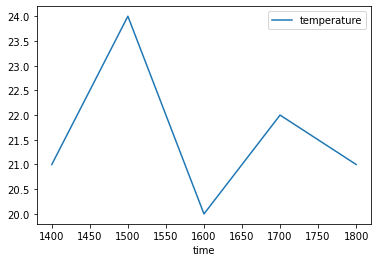

In [32]:
weather_merged.plot.line(x='time', y='temperature')

<AxesSubplot:xlabel='time'>

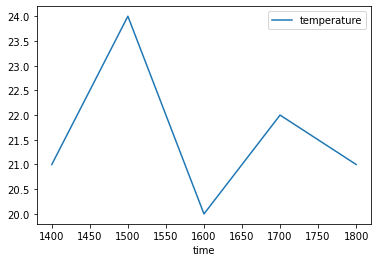

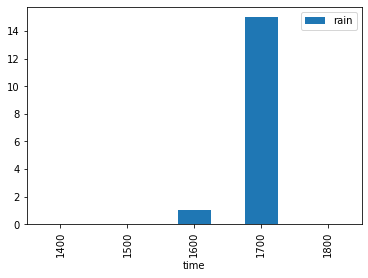

In [33]:
weather_merged.plot.line(x='time', y='temperature')
weather_merged.plot.bar(x='time', y='rain')

We can perform sophisticated compound operations easily in Pandas. For example for the XBT dataset, we know that measurements from different instrument types usually have different maximum depths. Lets find and plot the the mean of max depth for different probe types.

In [34]:
xbt_df.groupby('instrument').max_depth.mean()

instrument
XBT: DEEP BLUE (SIPPICAN)             823.839352
XBT: DEEP BLUE, UNKNOWN BRAND         602.000165
XBT: T10 (SIPPICAN)                    95.345037
XBT: T10 (UNKNOWN BRAND)               85.898360
XBT: T11 (SIPPICAN)                   308.822156
XBT: T11 (UNKNOWN BRAND)              154.671509
XBT: T4 (SIPPICAN)                    377.380205
XBT: T4 (TSK - TSURUMI SEIKI Co.)     402.662306
XBT: T4 (UNKNOWN BRAND)               434.371466
XBT: T5 (SIPPICAN)                   1489.610453
XBT: T5 (TSK - TSURUMI SEIKI Co.)    1244.224875
XBT: T5 (UNKNOWN BRAND)               891.807059
XBT: T6 (SIPPICAN)                    169.961629
XBT: T6 (TSK - TSURUMI SEIKI Co.)     714.895652
XBT: T6 (UNKNOWN BRAND)               410.791185
XBT: T7 (SIPPICAN)                    765.226844
XBT: T7 (TSK - TSURUMI SEIKI Co.)     776.078924
XBT: T7 (UNKNOWN BRAND)               733.521680
XBT: TYPE UNKNOWN                    3471.687500
XBT: XBT-7 (SPARTON)                  778.876879
Name: max

In [35]:
xbt_df.groupby('instrument').max_depth.mean()

instrument
XBT: DEEP BLUE (SIPPICAN)             823.839352
XBT: DEEP BLUE, UNKNOWN BRAND         602.000165
XBT: T10 (SIPPICAN)                    95.345037
XBT: T10 (UNKNOWN BRAND)               85.898360
XBT: T11 (SIPPICAN)                   308.822156
XBT: T11 (UNKNOWN BRAND)              154.671509
XBT: T4 (SIPPICAN)                    377.380205
XBT: T4 (TSK - TSURUMI SEIKI Co.)     402.662306
XBT: T4 (UNKNOWN BRAND)               434.371466
XBT: T5 (SIPPICAN)                   1489.610453
XBT: T5 (TSK - TSURUMI SEIKI Co.)    1244.224875
XBT: T5 (UNKNOWN BRAND)               891.807059
XBT: T6 (SIPPICAN)                    169.961629
XBT: T6 (TSK - TSURUMI SEIKI Co.)     714.895652
XBT: T6 (UNKNOWN BRAND)               410.791185
XBT: T7 (SIPPICAN)                    765.226844
XBT: T7 (TSK - TSURUMI SEIKI Co.)     776.078924
XBT: T7 (UNKNOWN BRAND)               733.521680
XBT: TYPE UNKNOWN                    3471.687500
XBT: XBT-7 (SPARTON)                  778.876879
Name: max

<AxesSubplot:xlabel='instrument'>

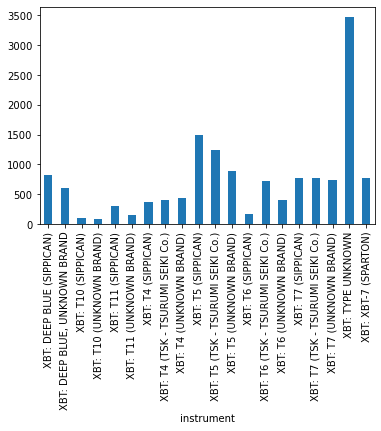

In [36]:
xbt_df.groupby('instrument').max_depth.mean().plot.bar()

## advantages of pandas
more efficient
scaling using dask
compact code
a lot of built in functionality and interoperability

### comparison with databases


SQL vs pandas
* https://towardsdatascience.com/sql-vs-pandas-which-one-to-choose-in-2020-a98f236829ef
* https://towardsdatascience.com/sql-vs-pandas-which-one-to-choose-in-2020-part-2-9268d4a69984

https://datascience.stackexchange.com/questions/34357/why-do-people-prefer-pandas-to-sql